In [1]:
# importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# loading house price data
hse_df = pd.read_csv(r"C:\Users\HP 820 G3\Documents\solar_data\housing_data_full.csv")
hse_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [2]:
# checking the dataframe shape
hse_df.shape

(1460, 81)

In [18]:
# checking the columns info
hse_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1338 entries, 0 to 1459
Data columns (total 34 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   MSSubClass    1338 non-null   int64  
 1   LotArea       1338 non-null   int64  
 2   LotConfig     1338 non-null   int32  
 3   Neighborhood  1338 non-null   int32  
 4   HouseStyle    1338 non-null   int32  
 5   OverallQual   1338 non-null   int64  
 6   OverallCond   1338 non-null   int64  
 7   YearBuilt     1338 non-null   int64  
 8   YearRemodAdd  1338 non-null   int64  
 9   RoofStyle     1338 non-null   int32  
 10  Exterior1st   1338 non-null   int32  
 11  Exterior2nd   1338 non-null   int32  
 12  ExterQual     1338 non-null   int32  
 13  BsmtQual      1338 non-null   int32  
 14  BsmtFinType1  1338 non-null   int32  
 15  BsmtFinSF1    1338 non-null   int64  
 16  TotalBsmtSF   1338 non-null   int64  
 17  HeatingQC     1338 non-null   int32  
 18  1stFlrSF      1338 non-null   int

In [4]:
# dropping columns with missing data greater than 15%
for col in hse_df.columns:
    if hse_df[col].isna().sum() > (0.15 * hse_df.shape[0]):
        hse_df.drop(col, axis=1, inplace=True)

In [5]:
hse_df.dropna(inplace=True)

In [ ]:
# generating a profile report of the data...this helps us have a quick check
# on the data e.g distribution, correlation e.t.c
from  ydata_profiling import ProfileReport

report = ProfileReport(hse_df)
report.to_file(r"C:\Users\HP 820 G3\Documents\solar_data\hse_df.html")

In [6]:
# from the profile report there are columns with zero correlation, all zeros, ones or constants which we will drop

drop_cols = ['Id', 'CentralAir', 'Electrical', 'LowQualFinSF', 
             'BsmtHalfBath', 'KitchenAbvGr', 'KitchenQual',
             'Functional', 'Fireplaces', 'PavedDrive', 'WoodDeckSF',
             'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch',
             'PoolArea', 'MiscVal', 'SaleType', 'SaleCondition', 'MSZoning',
             'Street', 'LotShape', 'LandContour', 'Utilities', 'LandSlope',
             'Condition1', 'Condition2', 'BldgType', 'RoofMatl', 'MasVnrArea',
             'ExterCond', 'Foundation', 'Heating'
            ]

In [7]:
bsmt_columns =  [c for c in hse_df.columns if c[:4] in ['Bsmt'] and c not in[
    'BsmtFullBath', 'BsmtFinSF1', 'BsmtFinType1', 'BsmtQual'
]]
drop_cols.extend(bsmt_columns)
hse_df.drop(drop_cols, axis=1, inplace=True)

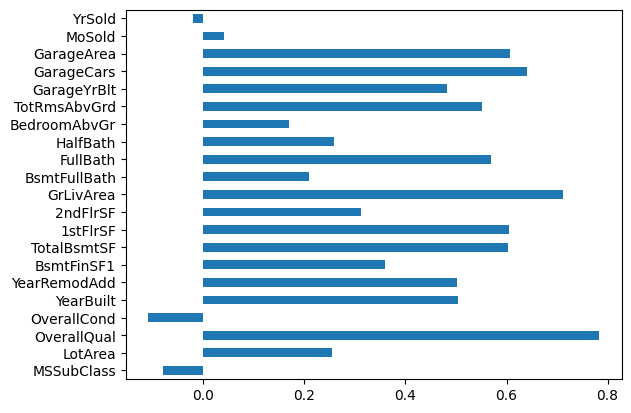

In [8]:
# plotting a bar graph to show the pearson correlations of the remaining columns with our target column 'SalePrice'

hse_df.corr(numeric_only=True).loc['SalePrice'][:-1].plot.barh()
plt.show()

"""
    From the plot above we can see some features with very high correlation such 
    as 'OveralQual'. Some features also have negative correlation while some with 
    low correlation.
"""

In [9]:
# importing scipy library to perform statistics as as pvalue

from scipy.stats import pearsonr
from pandas.api.types import is_numeric_dtype

# finding the pearson correlation and pvalue on numeric data only
for c in hse_df.columns[:-1]:
    if is_numeric_dtype(hse_df[c]):
        corr, pvalue = pearsonr(hse_df[c], hse_df['SalePrice'])
        print(f'{c : <40}: {corr : .4f}, significant:{pvalue <= 0.05}')

MSSubClass                              : -0.0796, significant:True
LotArea                                 :  0.2548, significant:True
OverallQual                             :  0.7835, significant:True
OverallCond                             : -0.1086, significant:True
YearBuilt                               :  0.5043, significant:True
YearRemodAdd                            :  0.5014, significant:True
BsmtFinSF1                              :  0.3597, significant:True
TotalBsmtSF                             :  0.6020, significant:True
1stFlrSF                                :  0.6047, significant:True
2ndFlrSF                                :  0.3114, significant:True
GrLivArea                               :  0.7117, significant:True
BsmtFullBath                            :  0.2097, significant:True
FullBath                                :  0.5693, significant:True
HalfBath                                :  0.2582, significant:True
BedroomAbvGr                            :  0.169

In [10]:
# dropping the columns with low significance(pvalue) i.e. less than 0.05

hse_df.drop(['MoSold', 'YrSold'], axis=1, inplace=True)

import phik

phik_corr = []
phik_signif = []
y = hse_df['SalePrice']

for c in hse_df.columns:
    x = hse_df[c]
    phik_corr.append(phik.phik_from_array(x, y))
    phik_signif.append(phik.significance.significance_from_array(x, y)[0])

In [12]:
# importing the library for further feature engineering i.e. convert non_numeric data
# to numeric
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
numeric_cols = hse_df.select_dtypes(include=np.number)

for c in hse_df.columns:
    if c not in numeric_cols:
        hse_df[c] = le.fit_transform(hse_df[c])

hse_df.head()

,MSSubClass,LotArea,LotConfig,Neighborhood,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,...,BedroomAbvGr,TotRmsAbvGrd,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,SalePrice
0,60,8450,4,5,5,7,5,2003,2003,1,...,3,8,1,2003.0,1,2,548,4,4,208500
1,20,9600,2,24,2,6,8,1976,1976,1,...,3,6,1,1976.0,1,2,460,4,4,181500
2,60,11250,4,5,5,7,5,2001,2002,1,...,3,6,1,2001.0,1,2,608,4,4,223500
3,70,9550,0,6,5,7,5,1915,1970,1,...,3,7,5,1998.0,2,3,642,4,4,140000
4,60,14260,2,15,5,8,5,2000,2000,1,...,4,9,1,2000.0,1,3,836,4,4,250000


In [21]:
# importing feature_selection to select 10 best features
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

k_best = SelectKBest(f_classif, k=10).fit_transform(hse_df.drop('SalePrice', axis=1), hse_df['SalePrice'])
idx = k_best[0].argsort()[::-1]
hse_new_df = hse_df.iloc[:, idx]

In [24]:
# including the target feature 'SalePrice' to the dataframe

hse_new_df['SalePrice'] = hse_df['SalePrice']
hse_new_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1338 entries, 0 to 1459
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   MSSubClass    1338 non-null   int64
 1   LotConfig     1338 non-null   int32
 2   OverallCond   1338 non-null   int64
 3   OverallQual   1338 non-null   int64
 4   RoofStyle     1338 non-null   int32
 5   LotArea       1338 non-null   int64
 6   YearRemodAdd  1338 non-null   int64
 7   YearBuilt     1338 non-null   int64
 8   HouseStyle    1338 non-null   int32
 9   Neighborhood  1338 non-null   int32
 10  SalePrice     1338 non-null   int64
dtypes: int32(4), int64(7)
memory usage: 104.5 KB


C:\Users\HP 820 G3\AppData\Local\Temp\ipykernel_24832\2561714685.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hse_new_df['SalePrice'] = hse_df['SalePrice']


In [25]:
# importing linear regression libraries
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# splitting the data into training and testing data
x_train, x_test, y_train, y_test = train_test_split(hse_new_df.drop('SalePrice', axis=1), hse_new_df['SalePrice'], random_state=42)


In [27]:
# training the linear regression model

lr = LinearRegression()
lr.fit(x_train, y_train)

# checking the metrics/scores for training and testing data
print(lr.score(x_train, y_train))
print(lr.score(x_test, y_test))

0.679057933325494
0.6637490107943302


In [28]:
# finding the coefficient and   intercept of the model

print(lr.coef_)
print(lr.intercept_)

[-1.73671744e+02 -1.25125914e+03  1.87492469e+03  4.08869256e+04
  8.83928733e+03  1.38383681e+00  2.75993218e+02  2.06276755e+02
  1.64678747e+03  5.47420641e+02]
-1057076.0729644026


In [54]:
from sklearn.linear_model import LassoCV

lr_l1 = LassoCV()
lr_l1.fit(x_train, y_train)

LassoCV()

In [55]:
lr_l1.coef_

array([  0.        ,  79.48110665,   0.        ,  64.43501997,
        16.30740924,  28.02437389,   0.        ,  -0.        ,
       677.83514321])

In [57]:
lr_l1.score(x_train, y_train)

0.7199450090072868

In [59]:
# tuning the model

from sklearn.linear_model import ElasticNetCV

lr_en = ElasticNetCV(l1_ratio=[.1,.3,.5,.7,.9,1])
lr_en.fit(x_train, y_train)
print(lr.score(x_train, y_train))
print(lr.score(x_test, y_test))

0.7785164519521838
0.6564647112126278


### After tuning the model the score in the test dataset is 0.65. The score is not quite high but can be still improved by feature selection or engineering.